## Embedding

Tutorial URL: https://www.tensorflow.org/tutorials/text/word_embeddings

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [2]:
embedding_layer = layers.Embedding(1000, 5)

When passing an integer to an embedding layer, the result replaces each integer with the vector from the embedding table. In the example below, 5 intergers were passed in. The result is three 5-D vectors.

In [34]:
result = embedding_layer(tf.constant([1,2,3]))
result.numpy() # Each integer becomes a 5-d vector from the embedding table.

array([[-0.0420702 , -0.01621173, -0.01747482,  0.0194451 , -0.03363853],
       [-0.02387723,  0.04052209, -0.02082926,  0.00316707,  0.03175017],
       [ 0.03048894, -0.03891071, -0.01321249, -0.022457  , -0.03461272]],
      dtype=float32)

For text or sequence problems, the Embedding layer takes a 2D tensor of integers, of shape (samples, sequence_length).
Example below, the input is 2 sequences, each of length 3.
Output shape is (samples, sequence_length, embedding_dimensionality), for the example it is (2, 3, 5) - 2 sequence, each of length 3, each word a 5-D vector.

In [15]:
result = embedding_layer(tf.constant([[0,1,2],[3,4,5]])) # 2 sequences of length 3
result.shape # 2 sequence of length 3, each of the 3 has 5 dimensions - (samples, sequence_length, embedding_dimensionality)

TensorShape([2, 3, 5])

### Train Embedding Layer with IMDB preprocessed dataset

To learn how to load text data:
https://www.tensorflow.org/tutorials/load_data/text

In [16]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)

In [17]:
encoder = info.features['text'].encoder
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [18]:
train_batches = train_data.shuffle(1000).padded_batch(10)
test_batches = test_data.shuffle(1000).padded_batch(10)

In [19]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[3923,   34, 1092, ...,    0,    0,    0],
       [  12,  604, 1694, ...,    0,    0,    0],
       [ 373,    6,    1, ...,    0,    0,    0],
       ...,
       [3216, 7961, 1205, ..., 3979, 3888,  782],
       [ 147,  698, 3868, ...,    0,    0,    0],
       [  12,  604, 1479, ...,    0,    0,    0]])

In [20]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches, validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 9s 3ms/step - loss: 0.5082 - accuracy: 0.6976 - val_loss: 0.3532 - val_accuracy: 0.8600
Epoch 2/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.2829 - accuracy: 0.8837 - val_loss: 0.3197 - val_accuracy: 0.7850
Epoch 3/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.2291 - accuracy: 0.9111 - val_loss: 0.3527 - val_accuracy: 0.8500
Epoch 4/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1967 - accuracy: 0.9253 - val_loss: 0.3238 - val_accuracy: 0.8600
Epoch 5/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.1744 - accuracy: 0.9352 - val_loss: 0.2727 - val_accuracy: 0.8850
Epoch 6/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.1545 - accuracy: 0.9440 - val_loss: 0.2110 - val_accuracy: 0.9100
Epoch 7/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1416 - accuracy: 0.9498 - val_loss: 0.3215 - val_accuracy:

In [79]:
model.layers[0].weights

[<tf.Variable 'embedding_3/embeddings:0' shape=(1000, 64) dtype=float32, numpy=
 array([[-0.0392769 , -0.02391567, -0.01614331, ..., -0.03819614,
          0.01055146, -0.04451637],
        [ 0.02352556,  0.0471116 ,  0.00887322, ..., -0.03820216,
         -0.00144156, -0.03407687],
        [ 0.01641888, -0.02198998,  0.04284486, ..., -0.01689691,
         -0.03526819,  0.04950699],
        ...,
        [ 0.00394324,  0.01595518, -0.03430422, ..., -0.03455622,
          0.01281926,  0.03256066],
        [ 0.03410131,  0.01304759, -0.00984068, ...,  0.02405175,
         -0.01724378,  0.00108243],
        [-0.00257509, -0.0124308 ,  0.00451894, ..., -0.04154489,
          0.0097238 , -0.04699888]], dtype=float32)>]

In [25]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

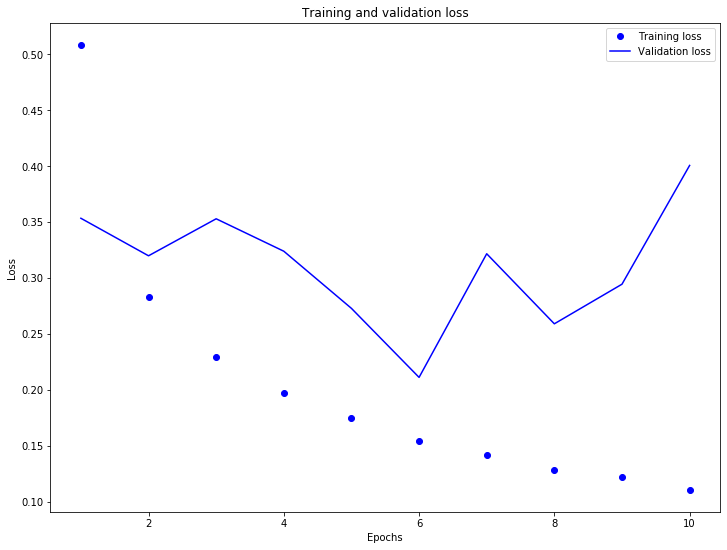

In [26]:
plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

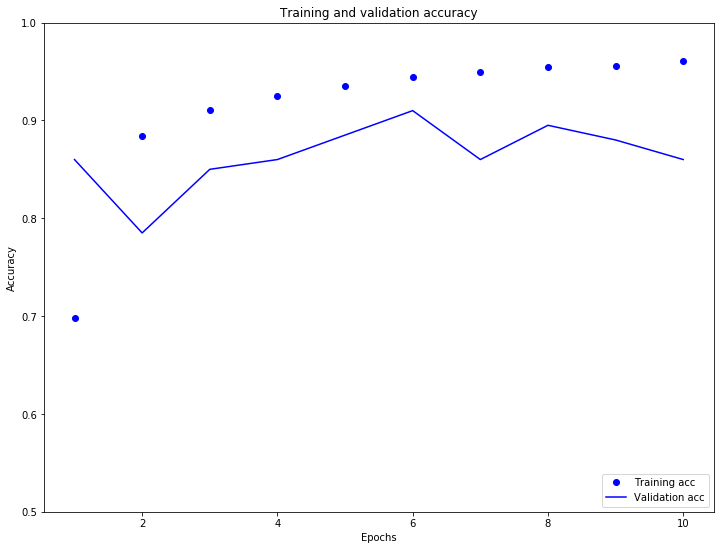

In [28]:
plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

### Retrieve Trained Embedding

In [29]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(8185, 16)


In [30]:
import io

encoder = info.features['text'].encoder

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for num, word in enumerate(encoder.subwords):
  vec = weights[num+1] # skip 0, it's padding.
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

## Keras RNN

In [74]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Here is a simple example of a Sequential model that processes sequences of integers, embeds each integer into a 64-dimensional vector, then processes the sequence of vectors using a LSTM layer.

In [75]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


## Text classification with an RNN

In [55]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [56]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

### Load Data

In [57]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [58]:
encoder = info.features['text'].encoder

### Explore Data

In [59]:
dataset # dataset is a dict

{'test': <_OptionsDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'train': <_OptionsDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'unsupervised': <_OptionsDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>}

In [51]:
type(info)

tensorflow_datasets.core.dataset_info.DatasetInfo

In [40]:
type(encoder)

tensorflow_datasets.core.features.text.subword_text_encoder.SubwordTextEncoder

In [62]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops._OptionsDataset

In [73]:
#import inspect
#inspect.getmembers(train_dataset)

In [41]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [42]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [43]:
assert original_string == sample_string

In [44]:
for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


### Prepare Data for Training

Create batches of these encoded strings. Use the padded_batch method to zero-pad the sequences to the length of the longest string in the batch.

In [45]:
# Prepare data for training
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

### Create Model

In [80]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])